In [1]:
import pandas as pd
from citipy import citipy
import random
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# create empty lists to hold random lat/longs
latitudes = []
longitudes = []

# populate the lists using the random library
for x in range(0, 2000):
    latitudes.append(random.randint(-90,90))
    longitudes.append(random.randint(-180,180))

In [3]:
cities = []
countries = []
newlats = []
newlongs = []
counter = 0
incrementer = 0

while counter < 600:
    # extract geocoordinates from random list
    lat = latitudes[incrementer]
    lon = longitudes[incrementer]
    # look up nearest city and its country code
    city = citipy.nearest_city(lat, lon)
    name = city.city_name
    country = city.country_code
    # ensure the city is not already in list
    if name not in cities:
        # log progress
        print(len(cities))
        # add city, lat, long, country to respective lists
        cities.append(name)
        countries.append(country)
        newlats.append(lat)
        newlongs.append(lon)
        # increment counter and incrementer
        counter = counter + 1
        incrementer = incrementer + 1
    else:
        incrementer = incrementer + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [4]:
api_key = '1d1ecf3f53e703ff85dc65bd842a1a80'
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
# London,uk
url = base_url + '&APPID=' + api_key + '&q='
url

'http://api.openweathermap.org/data/2.5/weather?&APPID=1d1ecf3f53e703ff85dc65bd842a1a80&q='

In [5]:
ajson = requests.get(url + 'london,uk').json()

In [6]:
print(json.dumps(ajson, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 51.5085,
        "lon": -0.1257
    },
    "dt": 1612685424,
    "id": 2643743,
    "main": {
        "feels_like": 269.45,
        "humidity": 87,
        "pressure": 1005,
        "temp": 275.04,
        "temp_max": 275.93,
        "temp_min": 274.26
    },
    "name": "London",
    "sys": {
        "country": "GB",
        "id": 1414,
        "sunrise": 1612682938,
        "sunset": 1612717223,
        "type": 1
    },
    "timezone": 0,
    "visibility": 4300,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 5.14
    }
}


In [7]:
newcities = []
newerlats = []
newerlongs = []
newcountries = []
temperatures = []
humidities = []
clouds = []
windspeeds = []
counter = 0
incrementer = 0

# continue calling API until 500 successful calls
while counter < 500:
    # read city, country, lat, long from list
    city = cities[incrementer]
    country = countries[incrementer]
    latitude = newlats[incrementer]
    longitude = newlongs[incrementer]
    # coustruct query URL and call
    tempurl = url + city + ',' + country
    thejson = requests.get(tempurl).json()
    # log API call
    print('requesting data for: ' + city)
    print('at url: ' + tempurl)
    
    try:
        # retrieve data from response JSON
        # convert temp from kelvin to farenheit
        temp = ((float(thejson['main']['temp']) - 273.15) * (9/5)) + 32  
        hum = thejson['main']['humidity']
        cld = thejson['clouds']['all']
        wind = thejson['wind']['speed']
    
        # store response data in respective lists
        temperatures.append(temp)
        humidities.append(hum)
        clouds.append(cld)
        windspeeds.append(wind)
        
        # store query data
        newcities.append(city)
        newcountries.append(country)
        newerlats.append(latitude)
        newerlongs.append(longitude)

        print(city + ' successfully added as record #' + str(counter))
        
        counter = counter + 1
        incrementer = incrementer + 1
    
    except:
        print(city + ' not found in owm, moving on...')
        incrementer = incrementer + 1

requesting data for: nikolskoye
at url: http://api.openweathermap.org/data/2.5/weather?&APPID=1d1ecf3f53e703ff85dc65bd842a1a80&q=nikolskoye,ru
nikolskoye successfully added as record #0
requesting data for: bredasdorp
at url: http://api.openweathermap.org/data/2.5/weather?&APPID=1d1ecf3f53e703ff85dc65bd842a1a80&q=bredasdorp,za
bredasdorp successfully added as record #1
requesting data for: ferkessedougou
at url: http://api.openweathermap.org/data/2.5/weather?&APPID=1d1ecf3f53e703ff85dc65bd842a1a80&q=ferkessedougou,ci
ferkessedougou successfully added as record #2
requesting data for: bluff
at url: http://api.openweathermap.org/data/2.5/weather?&APPID=1d1ecf3f53e703ff85dc65bd842a1a80&q=bluff,nz
bluff successfully added as record #3
requesting data for: taolanaro
at url: http://api.openweathermap.org/data/2.5/weather?&APPID=1d1ecf3f53e703ff85dc65bd842a1a80&q=taolanaro,mg
taolanaro not found in owm, moving on...
requesting data for: okha
at url: http://api.openweathermap.org/data/2.5/weat

In [12]:
city_df = pd.DataFrame({'City': newcities,
                   'Latitude': newerlats,
                   'Longitude': newerlongs,
                   'Temperature': temperatures,
                   'Humidity': humidities,
                   'Cloudiness': clouds,
                   'Wind Speed': windspeeds})

city_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,nikolskoye,45,179,12.056,92,75,6.00
1,bredasdorp,-59,20,69.800,68,100,2.57
2,ferkessedougou,10,-5,80.042,45,55,1.79
3,bluff,-56,166,58.442,86,99,3.64
4,okha,55,147,8.744,94,100,8.03


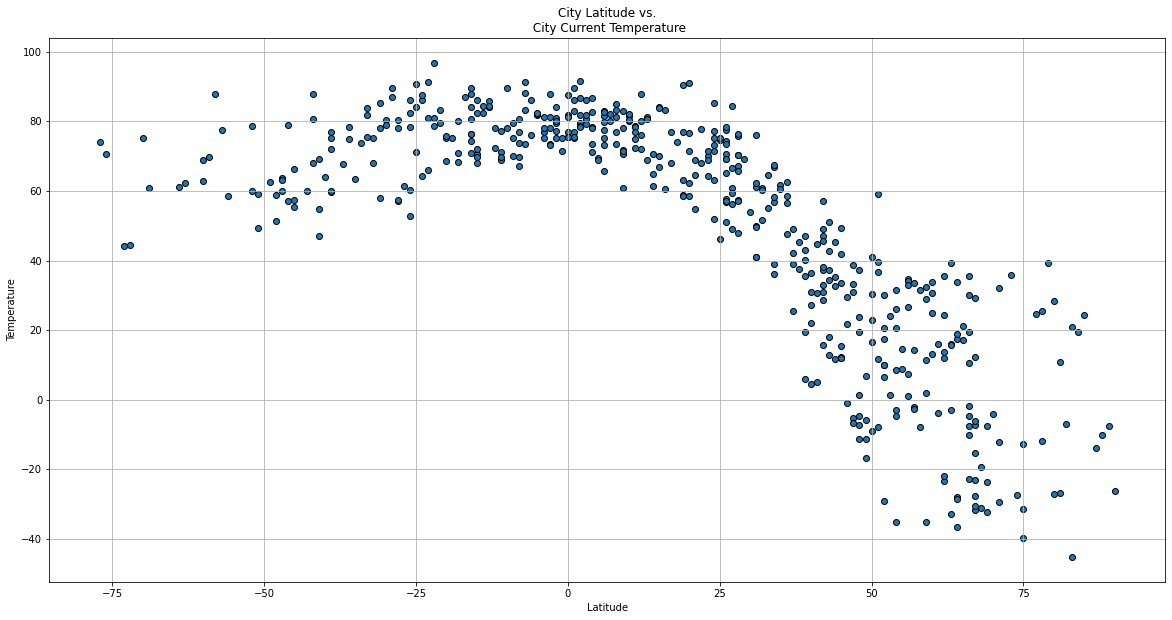

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(city_df['Latitude'], city_df['Temperature'], edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs.\n City Current Temperature')
plt.grid()
plt.savefig('output_files/lat_vs_temp.png')
plt.show()

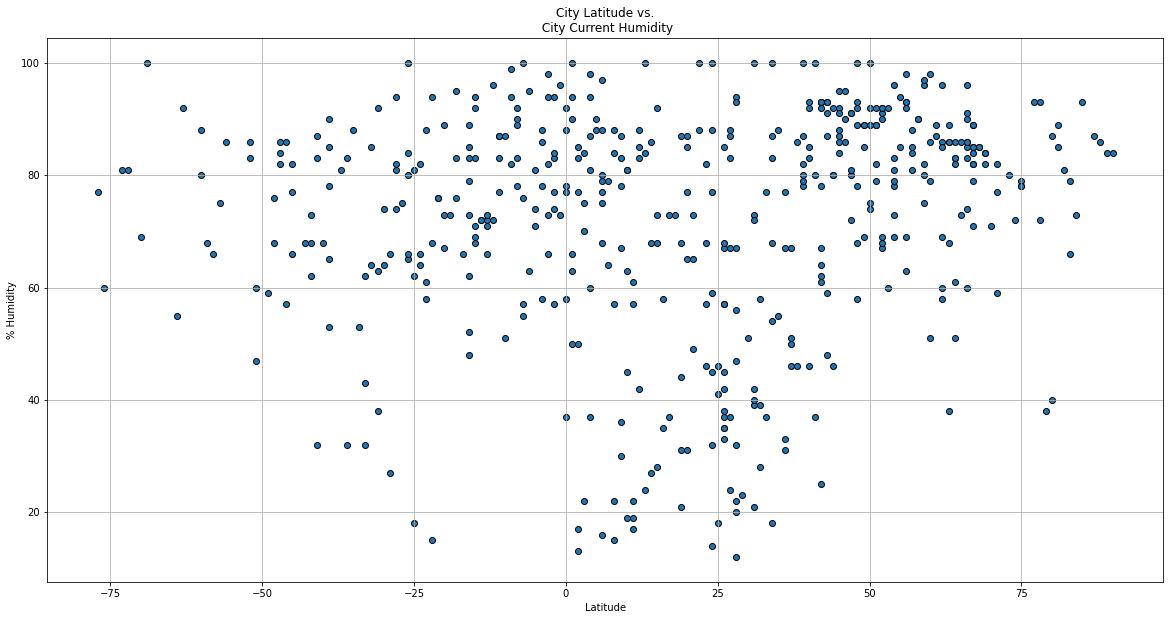

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(city_df['Latitude'], city_df['Humidity'], edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.title('City Latitude vs.\n City Current Humidity')
plt.grid()
plt.savefig('output_files/lat_vs_hum.png')
plt.show()

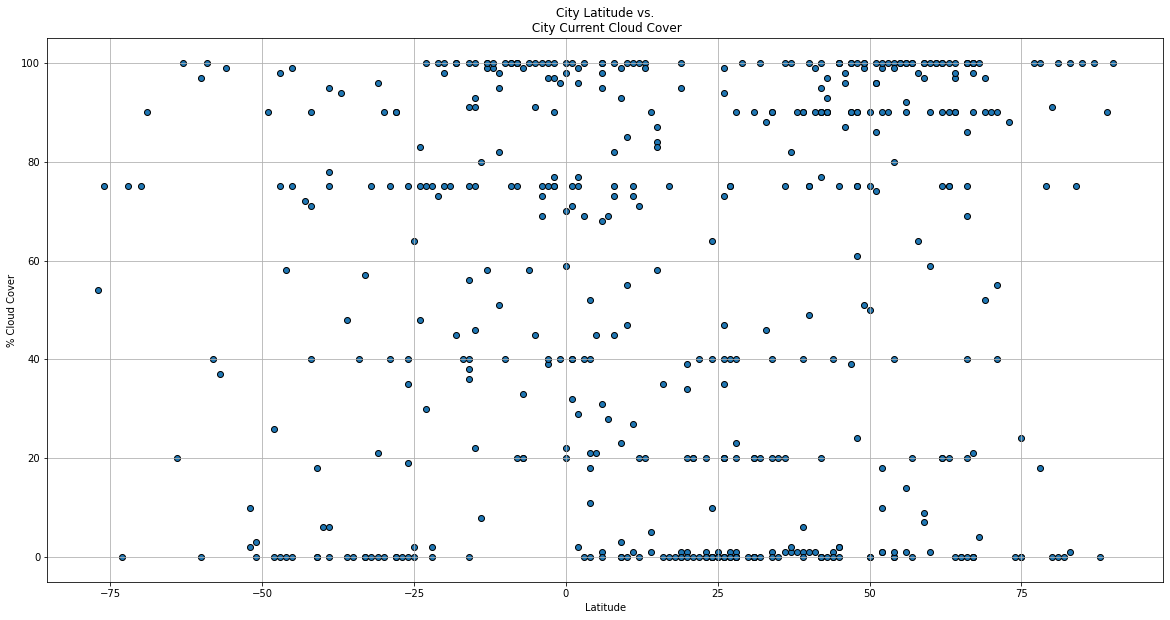

In [16]:
plt.figure(figsize=(20,10))
plt.scatter(city_df['Latitude'], city_df['Cloudiness'], edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('% Cloud Cover')
plt.title('City Latitude vs.\n City Current Cloud Cover')
plt.grid()
plt.savefig('output_files/lat_vs_cld.png')
plt.show()

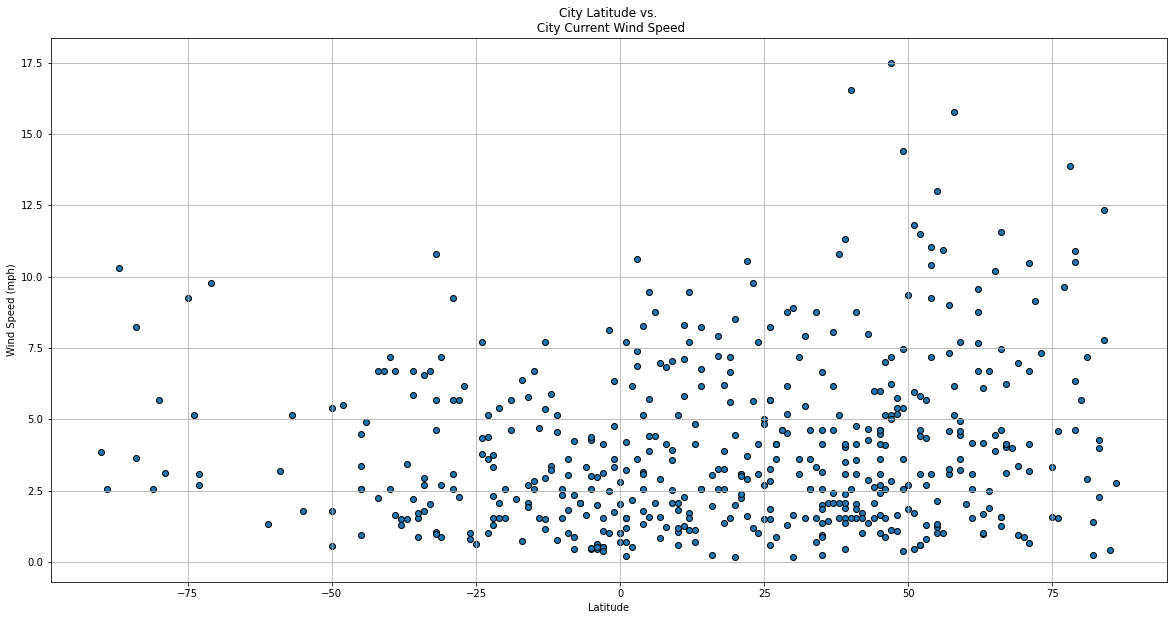

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(city_df['Latitude'], city_df['Wind Speed'], edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs.\n City Current Wind Speed')
plt.grid()
plt.savefig('output_files/lat_vs_wind.png')
plt.show()

In [17]:
city_df.to_csv('output_files/weather_vs_latitude.csv')

In [18]:

def regressplot(x, y):
    
    
    correlation = st.pearsonr(x,y)

   
    print(f"""The r-squared value is {round((correlation[0]**2),2)}""")

    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
   
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    return line_eq

In [19]:

north_df = city_df.loc[city_df['Latitude'] >= 0]
south_df = city_df.loc[city_df['Latitude'] < 0]
north_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,nikolskoye,45,179,12.056,92,75,6.00
2,ferkessedougou,10,-5,80.042,45,55,1.79
4,okha,55,147,8.744,94,100,8.03
5,agua prieta,31,-109,40.946,39,0,1.34
6,butaritari,6,176,81.500,80,98,8.76


The r-squared value is 0.75


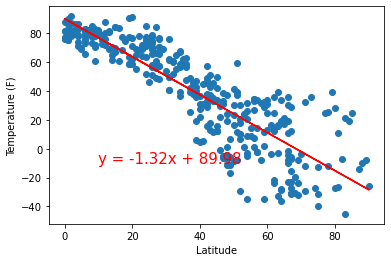

In [20]:

line_eq = regressplot(x = north_df['Latitude'], y = north_df['Temperature'])


plt.annotate(line_eq,(10,-10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig('Output_Files/North_Temp.png')

plt.show()

The r-squared value is 0.26


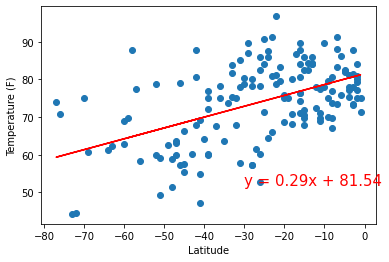

In [21]:
line_eq = regressplot(x = south_df['Latitude'], y = south_df['Temperature'])


plt.annotate(line_eq,(-30,52),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig('Output_Files/South_Temp.png')

plt.show()

The r-squared value is 0.11


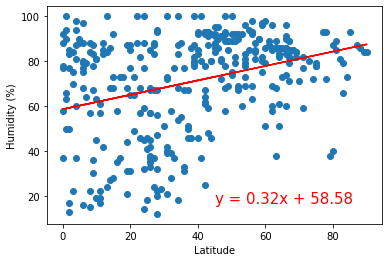

In [22]:

line_eq = regressplot(x = north_df['Latitude'], y = north_df['Humidity'])


plt.annotate(line_eq,(45,17),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig('Output_Files/North_Humidity.png')

plt.show()

The r-squared value is 0.02


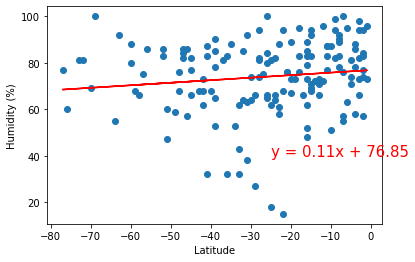

In [23]:
line_eq = regressplot(x = south_df['Latitude'], y = south_df['Humidity'])


plt.annotate(line_eq,(-25,40),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig('Output_Files/South_Humidity.png')

plt.show()

The r-squared value is 0.03


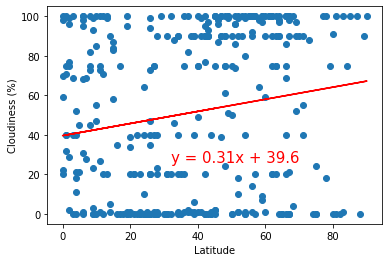

In [24]:
line_eq = regressplot(x = north_df['Latitude'], y = north_df['Cloudiness'])


plt.annotate(line_eq,(32,26),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig('Output_Files/North_Cloudiness.png')

plt.show()

The r-squared value is 0.03


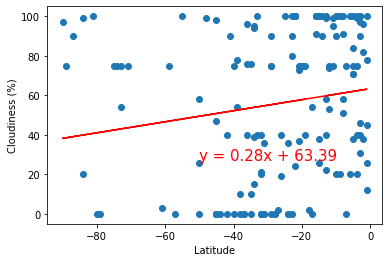

In [35]:

line_eq = regressplot(x = south_df['Latitude'], y = south_df['Cloudiness'])


plt.annotate(line_eq,(-50,27),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig('Output_Files/South_Cloudiness.png')

plt.show()

The r-squared value is 0.03


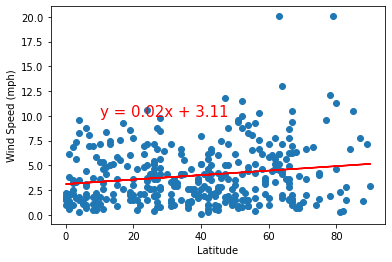

In [25]:
line_eq = regressplot(x = north_df['Latitude'], y = north_df['Wind Speed'])


plt.annotate(line_eq,(10,10),fontsize=15,color="red")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('Output_Files/North_WindSpeed.png')

plt.show()

The r-squared value is 0.04


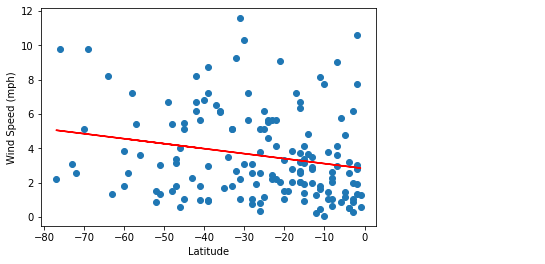

In [26]:
line_eq = regressplot(x = south_df['Latitude'], y = south_df['Wind Speed'])


plt.annotate(line_eq,(10,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('Output_Files/South_WindSpeed.png')

plt.show()